<a href="https://colab.research.google.com/github/CHIRAGVERMA1/ANN1-ai1-fall2019/blob/master/SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
from tqdm import tqdm

class ODESolver:
    """ODESolver superclass
    Any classes inheriting from this superclass must implement
    advance() method.
    """

    def __init__(self, f):
        self.f = f 

    def advance(self):
        """Advance solution one time step."""
        raise NotImplementedError
    
    def set_initial_conditions(self, U0):
        if isinstance(U0, (int, float)):
            # Scalar ODE
            self.number_of_eqns = 1
            U0 = float(U0)
        else:
            # System of eqns 
            U0 = np.asarray(U0)
            self.number_of_eqns = U0.size 
        self.U0 = U0
    
    def solve(self, time_points):

        self.t = np.asarray(time_points)
        n = self.t.size 
        
        self.u = np.zeros((n, self.number_of_eqns))

        self.u[0, :] = self.U0 

        # Integrate 
        for i in tqdm(range(n - 1), ascii=True):
            self.i = i
            self.u[i + 1] = self.advance()

        return self.u[:i+2], self.t[:i+2]

class ForwardEuler(ODESolver):
    def advance(self):
        u, f, i, t = self.u, self.f, self.i, self.t 
        dt = t[i + 1] - t[i]
        return u[i, :] + dt * f(u[i, :], t[i])

  0%|          | 0/1999999 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
100%|##########| 1999999/1999999 [00:29<00:00, 67441.83it/s]


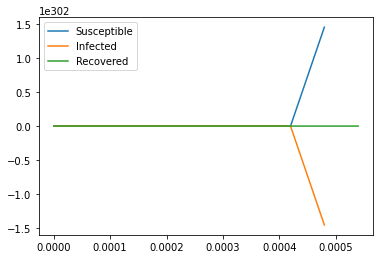

In [4]:
import numpy as np
from matplotlib import pyplot as plt

class SIR:
    def __init__(self, nu, beta, S0, I0, R0):
        """
        nu, beta: parameters in the ODE system
        S0, I0, R0: initial values
        """

        if isinstance(nu, (float, int)):
            # Is number?
            self.nu = lambda t: nu 
        elif callable(nu):
            self.nu = nu

        if isinstance(beta, (float, int)):
            self.beta = lambda t: beta 
        elif callable(beta):
            self.beta = beta

        self.initial_conditions = [S0, I0, R0]

    def __call__(self, u, t):

        S, I, _ = u 

        return np.asarray([
            -self.beta(t)*S*I, # Susceptibles
            self.beta(t)*S*I - self.nu(t)*I, # Infected
            self.nu(t)*I # Recovered
        ])

if __name__ == "__main__":

    sir = SIR(0.06, 0.109, 13526000000, 1, 0)
    solver = ForwardEuler(sir)
    solver.set_initial_conditions(sir.initial_conditions)

    time_steps = np.linspace(0, 120, 2000000)
    u, t = solver.solve(time_steps)

    plt.plot(t, u[:, 0], label="Susceptible")
    plt.plot(t, u[:, 1], label="Infected")
    plt.plot(t, u[:, 2], label="Recovered")
    plt.legend()
    plt.show()